<div style="text-align:center; color:#00B8DE">
    <h1>Unconstrained Optimization notebook Part1</h1>
</div>
<br>
<br>
In this notebook, I implement several optimization algorithms, first testing the benefit of backtracking against constant step size for Gradient Descent and Newton algorithms. Then, we consider the behavior of conjugate-gradient and Polack-Ribière technique that work without knowledge of the Hessian matrix of the function to be optimized.

### <span style="color:#00B8DE"> I - Function plot </span>

**1)** Let us consider the function $f(x,y)=[(x-2)\sin(y-1)]^2+x^2+y^2$ 
 and visualize it on the square with vertices $(\pm 3,\pm 3)$.

### <span style="color:#00B8DE"> II - Backtracking </span>

**2)** Testing the benefit of backtracking. We calculate the gradient of this function and implement gradient algorithm
for constant stepsize equal to 0.1 and then 0.01 and using backtracking. We the compare the numbers of iterations necessary for convergence with initialization at point $(−4, -2)$ and residual error for the distance to the optimum smaller than $10^{−3}$.

### <span style="color:#00B8DE"> III - Gradient and Newton </span>
**3)** Implementing Newton algorithm with backtracking to minimize $f(x,y)$ and comparing results to gradient algorithm with backtracking.


---------
### <span style="color:#00B8DE"> I - Function plot </span>


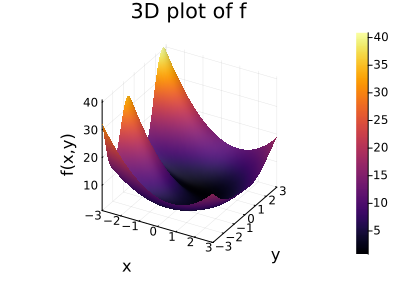

In [1]:
using Plots
function f(x,y)
    return ((x.-2) .* sin.(y.-1)).^2 +x.^2 +y.^2
end
x_range = -3:0.1:3
y_range = -3:0.1:3
surface(x_range, y_range, f, xlabel="x", ylabel="y", zlabel="f(x,y)", title="3D plot of f", size=(400,300))

In [2]:
function ∇f(x, y)
    df_dx = 2 * (x - 2) * sin(y - 1)^2 + 2 * x
    df_dy = 2 * (x - 2)^2 * sin(y - 1) * cos(y - 1) + 2 * y
    return [df_dx, df_dy]
end
opt = [0.09172811859570773;0.7789586896619789]
println("min f(x,y) = $(f(opt[1],opt[2]))")
println("optimum at (x*,y*) = ($(opt[1]),$(opt[2]))")

min f(x,y) = 0.7902328773913346
optimum at (x*,y*) = (0.09172811859570773,0.7789586896619789)


### <span style="color:#00B8DE"> II - Backtracking </span>

In [3]:
# Gradient algorithm constant stepsize
using LinearAlgebra: norm
precision = 10.e-3
max_iter  = 10e4
init      = Float64[-4, -2]
# Constant stepsize
function gradient_descent_constant_step(f,∇f,alpha, precision, max_iter, init, opt)
    pt         = copy(init)
    nb_const   = 0
    resu_const = pt #Trajectory of the algorithm 
    while norm(pt-opt)>precision && nb_const<max_iter
        grad_x, grad_y = ∇f(pt[1], pt[2])
        pt[1] -= alpha * grad_x
        pt[2] -= alpha * grad_y
        nb_const += 1
        resu_const  = [resu_const pt]
    end
    return pt, nb_const,resu_const 
end
point_alpha1 , nb_const_alpha1, resu_const_alpha1  = gradient_descent_constant_step(f, ∇f, 0.1, precision, max_iter,init, opt)
point_alpha2, nb_const_alpha2 , resu_const_alpha2= gradient_descent_constant_step(f, ∇f, 0.01, precision, max_iter,Float64[-4, -2] , opt)

([0.1014510272660976, 0.7766255195225246], 689, [-3.917610217199022 -3.917610217199022 … 0.1016196105826133 0.1014510272660976; -2.060589579351613 -2.060589579351613 … 0.7765846391535779 0.7766255195225246])

In [4]:
# Backtracking
function backtracking(x,f,∇f, d, alpha)

    y=zeros(2) 
    n = 0 
    ρ = 1
    beta = 0.7
    grad_norm = norm(∇f(x[1], x[2])) 
    while f(x[1]+ ρ*d[1],x[2]+ ρ*d[2]) > f(x[1],x[2]) - alpha * ρ * grad_norm
        ρ *= beta # Reduce step size
        n +=1
    end
    y[1] = x[1] + ρ * d[1]
    y[2] = x[2] + ρ * d[2]
    return y,n 
end

backtracking (generic function with 1 method)

In [5]:
# Gradient algorithm
# with backtracking
#-------------------
pt             = Float64[-4, -2]
function gradient_descent_with_backtracking(f, ∇f, pt, opt, precision, max_iter,alpha) 
    nb_iter_grad   = 0  # number of loops
    nb_loops_grad  = 0  # number of inner loops count for backtracking
    resu_grad      = pt #Trajectory of the algorithm 
    while norm(pt-opt)>precision && nb_iter_grad<max_iter
        nb_iter_grad  += 1
        d = -∇f(pt[1], pt[2]) 
        pt , n = backtracking(pt,f,∇f, d, alpha)
        nb_loops_grad += n 
        resu_grad      = [resu_grad pt]
    end
    return  resu_grad, nb_loops_grad , nb_iter_grad
end
resu_grad, nb_loops_grad , nb_iter_grad = gradient_descent_with_backtracking(f, ∇f, pt, opt, precision, max_iter,0.25) 

([-4.0 -3.525039297719139 … 0.06645640800627682 0.08997049705743079; -2.0 -2.3492868676357594 … 0.7022708282220991 0.7837298299223362], 31, 10)

In [6]:
println("Error with constant stepsize 0.1: $(norm(resu_const_alpha1[:,end]-opt))")
println("Number of iterations with constant stepsize 0.1: $nb_const_alpha1\n\n")

println("Error with constant stepsize 0.01: $(norm(resu_const_alpha2[:,end]-opt))")
println("Number of iterations with constant stepsize 0.01: $nb_const_alpha2\n\n")

println("Error with backtracking: $(norm(resu_grad[:,end]-opt))")
println("Number of iterations for backtracking= $nb_iter_grad")
println("Number of inner loops for backtracking = $nb_loops_grad")

Error with constant stepsize 0.1: 0.008455590467354548
Number of iterations with constant stepsize 0.1: 26


Error with constant stepsize 0.01: 0.009998931738560068
Number of iterations with constant stepsize 0.01: 689


Error with backtracking: 0.00508458580966211
Number of iterations for backtracking= 10
Number of inner loops for backtracking = 31


##### We observe that with backtracking we were able to obtain the smallest error in less iterations (converged quickly compared to GD with constant step size) 

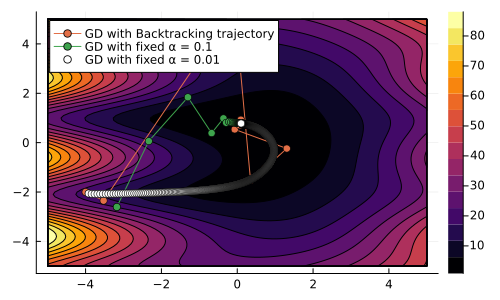

In [7]:
# Figure
x = -5:0.1:5
y = -5:0.1:5
contourf(x, y, f) 
plot!(resu_grad[1, :], resu_grad[2, :], label="GD with Backtracking trajectory", marker=:circle, size=(500,300))
plot!(resu_const_alpha1[1, :], resu_const_alpha1[2, :] , label="GD with fixed α = 0.1", marker=:circle) 
plot!(resu_const_alpha2[1, :], resu_const_alpha2[2, :] , label="GD with fixed α = 0.01", marker=:circle, color=:white) 

### <span style="color:#00B8DE"> III - Gradient and Newton </span>

In [8]:
function d2f_dx2(x,y)
    return 2 * sin(y − 1)^2 +2
end

function d2f_dy2(x,y) 
    return 2 * (x − 2)^2 * (cos(y − 1)^2 − sin(y − 1 )^2) +2
end

function d2f_dxdy(x,y) 
   return 4 * (x − 2) * sin(y − 1) * cos(y − 1)
end
function d2f_dydx(x,y)
    return 4 * (x − 2) * sin(y − 1) * cos(y − 1)
end

d2f_dydx (generic function with 1 method)

In [9]:
# Newton algorithm (with backtracking)
#-------------------------------------
#Hessian Matrix
function ∇2f(x,y)
    return [
        d2f_dx2(x, y)  d2f_dxdy(x, y);  # First row: d2f_dx2 and d2f_dxdy
        d2f_dydx(x, y) d2f_dy2(x, y)     # Second row: d2f_dydx and d2f_dy2
    ]
end
pt        = init
function Newton_with_backtracking(f,∇f,∇2f, pt, opt, precision, max_iter,alpha) 
    nb_iter   = 0        # number of loops
    nb_loops  = 0        # number of inner loops count for backtracking
    resu_N    = pt
    
    while norm(pt-opt)>precision && nb_iter<max_iter
        nb_iter +=1 
        d = - inv(∇2f(pt[1],pt[2])) * ∇f(pt[1],pt[2]) #search direction 
        pt , n =  backtracking(pt,f,∇f,d, alpha)
        nb_loops += n
        resu_N = [resu_N pt]
    end
    return resu_N, nb_loops , nb_iter
end
resu_N, nb_loops , nb_iter = Newton_with_backtracking(f, ∇f, ∇2f,pt, opt, precision, max_iter,0.01) 

([-4.0 0.22651953486828624 … -0.10211700959106706 0.09049590702339394; -2.0 -1.8859518489954588 … 0.7249228607293848 0.7707667253897672], 3, 7)

In [10]:
println("Error with Newton+backtracking: $(norm(resu_N[:,end]-opt))")
println("Number of iterations for Newton= $nb_iter")
println("Nnumber of inner loops for Newton = $nb_loops")

Error with Newton+backtracking: 0.008284118782111763
Number of iterations for Newton= 7
Nnumber of inner loops for Newton = 3


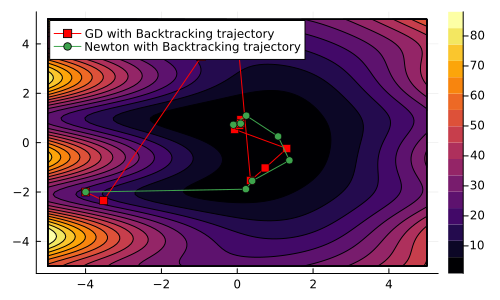

In [11]:
# Figure: gradient and Newton with backtracking
x = -5:0.1:5
y = -5:0.1:5
contourf(x, y, f) 
plot!(resu_grad[1, :], resu_grad[2, :], label="GD with Backtracking trajectory", marker=:square, color=:red, size=(500,300)) 
plot!(resu_N[1, :], resu_N[2, :] , label="Newton with Backtracking trajectory", marker=:circle) 

##### We observe that when using the appropiate hyperparameters for backtracking in each algorithm (alpha =0.01 for Newton and 0.25 for GD) that Newton algorithm converges faster. It only needs 7 iterations of the algorithm and 3 iterations for the backtracking loop, while GD requires 10 iterations and 31 iterations in the backtracking loop. This is because Newton method uses second-order derivatives (the Hessian matrix) to adjust the step size, allowing it to make more informed jumps directly toward the optimum. This leads to quadratic convergence, meaning it converges much more rapidly near the solution compared to the linear convergence of Gradient Descent. 